In [1]:
"""
In this program the task is to recommend users on online social networks based on shared connections.
The logic is that if two users have the same friends, they are higly similar and worth recommending to each other.
"""

# Creating an instance of the twitter connection
import twitter
consumer_key = 'ysled1Vd292M3P6Y5HBhdInrT'
consumer_secret = 'icsVBE8MASwZNrdRYBlr74Rx955rtgaBVbZOWuoPDgvOFKbDvC'
access_token = '1223330048-VDr9S3dsWm8b3l8EBDNK1DwmXD8V0hzaLKmr1gn'
access_token_secret = 'nEnLTbYQ7pfr5EqzM7BLNNcAk3RmT3gZUzvuUXskUECUh'
authorization = twitter.OAuth(access_token, access_token_secret, consumer_key, consumer_secret)
t = twitter.Twitter(auth=authorization, retry=True)

In [2]:
# Setting up the filenames
import os
data_folder = os.path.join(os.path.expanduser("~"), "OneDrive", "Desktop", "Pace", "CS619", "Chapter07", "Data")
output_filename = os.path.join(data_folder, "python_tweets.json")

In [3]:
# Searching for tweets that mention the word python and storing the tweets text and users in two lists
# Creating a dictionary mapping that will use the user IDs later
original_users = []
tweets = []
user_ids = {}

search_results = t.search.tweets(q="python", count=100)['statuses']
for tweet in search_results:
    if 'text' in tweet:
        original_users.append(tweet['user']['screen_name'])
        user_ids[tweet['user']['screen_name']] = tweet['user']['id']
        tweets.append(tweet['text'])

In [4]:
# Checking obtained original_users data (only first 10)
original_users[:10]

['Educada_mente',
 'kyota_python',
 'sheryls_shezza',
 'vinoddsce',
 'PRWolfAL',
 'iam__meg',
 'kunihisa_ogawa',
 'anas0ahmed1',
 'PaisanoTania',
 '_war77']

In [5]:
# Checking obtained tweets data (only first 10)
tweets[:10]

['Recopilación de cosas gratuitas para combatir la cuarentena: https://t.co/WIVFIYhClE\nUna forma de hacer llegar los… https://t.co/3IBIXgf11c',
 'wacci 『フレンズ』Short Ver. https://t.co/dY8XUBNcjC @YouTubeより\n\n今期だとこの曲好き',
 'RT @gp_pulipaka: Stata to R Cheat Sheet for Data Science. #BigData #Analytics #DataScience #IoT #IIoT #PyTorch #Python #RStats #TensorFlow…',
 "RT @ikezedev: Implementing Python's `range` in JavaScript using generator with a plus 😉\n=&gt; Supports floats for step.\nWhat do you think?\n#ja…",
 '@python_volley Xenofobia? Vc tá mesmo achando q  eu, nordestino, estou tornando isso em xenofobia?\nCara, qm sempre… https://t.co/JFOICDxar6',
 'Pythonの参考書、原書ならネットで無料で配布されてる！\n本当にいい時代に生まれたなぁ…\nこれで英語もPythonも同時に学べるね👍',
 '久しぶりに2年前に作ったPythonのプログラムを見たらまだ理解できた。4年前に作ったJavaScriptのプログラムを見たら「???」の所がいっぱいあった。',
 '@Ellpeck @DeadlyMitten Where are you learning from? I know basic python from my first semester of uni. I might try and learn more.',
 'RT @msdevlatam: Conoce con este tutorial de @

In [6]:
# Checking obtained user_ids data (only first 10)
import itertools

dict(itertools.islice(user_ids.items(), 10))

{'Educada_mente': 805356136929038337,
 'kyota_python': 1017730465111760898,
 'sheryls_shezza': 997549507050070016,
 'vinoddsce': 1470288691,
 'PRWolfAL': 1072216048777220098,
 'iam__meg': 951692437323366400,
 'kunihisa_ogawa': 89696364,
 'anas0ahmed1': 905550157,
 'PaisanoTania': 1220163402900832263,
 '_war77': 996732821858287617}

In [7]:
# Setting the model filename
model_filename = os.path.join(os.path.expanduser("~"), 'OneDrive', 'Desktop', 'Pace', 'CS619', 'Chapter07', 'Data', 'python_context.pkl')

In [8]:
# Program used in Chapter06 for performing the classification of data
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.base import TransformerMixin
from nltk import word_tokenize

class BagOfWords(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return [{word: True for word in word_tokenize(document)}
                 for document in X]

In [9]:
# Loading the model
import joblib
context_classifier = joblib.load(model_filename)
context_classifier

Pipeline(memory=None,
         steps=[('bag-of-words',
                 <__main__.BagOfWords object at 0x0000022CC38B3AC0>),
                ('vectorizer',
                 DictVectorizer(dtype=<class 'numpy.float64'>, separator='=',
                                sort=True, sparse=True)),
                ('naive-bayes',
                 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         verbose=False)

In [10]:
# Calling the predict function on the model 
y_pred = context_classifier.predict(tweets)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Getting just relevant tweets and their users
relevant_tweets = [tweets[i] for i in range(len(tweets)) if y_pred[i] == 1]
relevant_users = [original_users[i] for i in range(len(tweets)) if y_pred[i] == 1]
len(relevant_users)

21

In [12]:
# Creating a function to take a twitter user's ID value and return their friends
import time
import sys


def get_friends(t, user_id):
    friends = []
    cursor = -1
    while cursor != 0:
        try:
            results = t.friends.ids(user_id=user_id, cursor=cursor, count=5000)
            friends.extend([friend for friend in results['ids']])
            cursor = results['next_cursor']
            if len(friends) >= 10000:
                break
        except TypeError as e:
            if results is None:
                print('You probably reached your API limit, waiting for 5 minutes')
                sys.stdout.flush()
                time.sleep(5*60) # 5 minute wait
            else:
                # Some other error happened, so raise the error as normal
                raise e
        except twitter.TwitterHTTPError as e:
            print(e)
            break
        finally:
            # Break regardless -- this stops us going over our API limit
            time.sleep(60)
    return friends

In [13]:
# Storing friends in a dictionary
friends = {}
for screen_name in relevant_users:
    user_id = user_ids[screen_name]
    friends[user_id] = get_friends(t, user_id)

dict(itertools.islice(friends.items(), 10))   # Checking friends data (only first 10)

{997549507050070016: [3237673034,
  2311645130,
  3040871649,
  58219570,
  22152013,
  96013710,
  14511951,
  365216346,
  23585910,
  832547220931108865,
  562041755,
  14181969,
  116141566,
  57314296,
  568825492,
  951840618,
  4886800145,
  354133033,
  914044949611651072,
  976206118618791937,
  925707846561484800,
  64714144,
  22346932,
  57319680,
  397350174,
  35749264,
  20664471,
  479575328,
  17961859,
  36595974,
  925873174306320391,
  224161598,
  2985479932,
  265776571,
  20167623,
  350890828,
  2729250985,
  184459273,
  61524920,
  846137120209190912,
  727338733423464448,
  260960777,
  304679484,
  370290486,
  19402238,
  14647570,
  911210737665822720,
  106397338,
  4573061594,
  4020532937,
  799389318749954048,
  1018559751280627713,
  48370227,
  1915012974,
  89211580,
  977453211681374208,
  300428275,
  774195721000087552,
  19282280,
  143415291,
  8973062,
  1187157095239573504,
  72831048,
  1048249118001430529,
  714051110,
  490036238,
  112641

In [14]:
# Removing any user who doesn't have any friends
friends = {user_id:friends[user_id] for user_id in friends if len(friends[user_id]) > 0}
dict(itertools.islice(friends.items(), 10))   # Checking friends data (only first 10)

{997549507050070016: [3237673034,
  2311645130,
  3040871649,
  58219570,
  22152013,
  96013710,
  14511951,
  365216346,
  23585910,
  832547220931108865,
  562041755,
  14181969,
  116141566,
  57314296,
  568825492,
  951840618,
  4886800145,
  354133033,
  914044949611651072,
  976206118618791937,
  925707846561484800,
  64714144,
  22346932,
  57319680,
  397350174,
  35749264,
  20664471,
  479575328,
  17961859,
  36595974,
  925873174306320391,
  224161598,
  2985479932,
  265776571,
  20167623,
  350890828,
  2729250985,
  184459273,
  61524920,
  846137120209190912,
  727338733423464448,
  260960777,
  304679484,
  370290486,
  19402238,
  14647570,
  911210737665822720,
  106397338,
  4573061594,
  4020532937,
  799389318749954048,
  1018559751280627713,
  48370227,
  1915012974,
  89211580,
  977453211681374208,
  300428275,
  774195721000087552,
  19282280,
  143415291,
  8973062,
  1187157095239573504,
  72831048,
  1048249118001430529,
  714051110,
  490036238,
  112641

In [15]:
# Iterating over all the friend lists and then counting each time a friend occurs
from collections import defaultdict


def count_friends(friends):
    friend_count = defaultdict(int)
    for friend_list in friends.values():
        for friend in friend_list:
            friend_count[friend] += 1
    return friend_count

In [16]:
# Computing the current friend count
friend_count = count_friends(friends)

from operator import itemgetter
best_friends = sorted(friend_count, key=friend_count.get, reverse=True)
best_friends

[44196397,
 534563976,
 50393960,
 783214,
 20536157,
 13334762,
 807095,
 254791849,
 2735246778,
 816653,
 813286,
 5402612,
 25073877,
 50090898,
 742143,
 393033324,
 14174897,
 2996502625,
 63873759,
 352053266,
 191225303,
 6603532,
 33838201,
 1668100142,
 220145170,
 19402238,
 11348282,
 17471979,
 3314148722,
 571202103,
 158065720,
 2398551432,
 2197265034,
 302666251,
 767936412,
 2425151,
 80422885,
 15492359,
 254107028,
 216939636,
 33836629,
 750554018,
 398087684,
 68746721,
 15804774,
 745911914,
 564919357,
 326912209,
 2916305152,
 34743251,
 1344951,
 17000457,
 74286565,
 66780587,
 2292889800,
 4398626122,
 91985735,
 15813140,
 20571756,
 380749300,
 1339835893,
 224161598,
 20167623,
 14647570,
 21581503,
 19658826,
 22256645,
 574827627,
 15736190,
 2467791,
 428333,
 56505125,
 254218142,
 420730316,
 14137772,
 341643950,
 400286802,
 931055758971752448,
 4820804277,
 14607140,
 20731304,
 266400754,
 12524622,
 220139885,
 3018841323,
 2343198944,
 78889870

In [17]:
# Looping through friends of users
while len(friends) < 150:
    for user_id in best_friends:
        if user_id in friends:
            # Already have this user, move to next one
            continue
        print(user_id)
        sys.stdout.flush()
        friends[user_id] = get_friends(t, user_id)
        for friend in friends[user_id]:
            friend_count[friend] += 1
        best_friends = sorted(friend_count.items(), key=itemgetter(1), reverse=True)
        break

44196397
(44196397, 9)
(50393960, 8)
(50393960, 9)
(50393960, 10)
(50393960, 11)
(50393960, 12)
(50393960, 13)
(50393960, 14)
(50393960, 15)
(50393960, 16)
(50393960, 17)
(50393960, 18)
(50393960, 19)
(50393960, 20)
(50393960, 21)
(50393960, 22)
(50393960, 23)
(50393960, 24)
(50393960, 25)
(50393960, 26)
(50393960, 27)
(50393960, 28)
(50393960, 29)
(50393960, 30)
(50393960, 31)
(50393960, 32)
(50393960, 33)
(50393960, 34)
(50393960, 35)
(50393960, 36)
(50393960, 37)
(50393960, 38)
(50393960, 39)
(50393960, 40)
(50393960, 41)
(50393960, 42)
(50393960, 43)
(50393960, 44)
(50393960, 45)
(50393960, 46)
(50393960, 47)
(50393960, 48)
(50393960, 49)
(50393960, 50)
(50393960, 51)
(50393960, 52)
(50393960, 53)
(50393960, 54)
(50393960, 55)
(50393960, 56)
(50393960, 57)
(50393960, 58)
(50393960, 59)
(50393960, 60)
(50393960, 61)
(50393960, 62)
(50393960, 63)
(50393960, 64)
(50393960, 65)
(50393960, 66)
(50393960, 67)
(50393960, 68)
(50393960, 69)
(50393960, 70)
(50393960, 71)
(50393960, 72)
(503

In [19]:
len(friends), type(friends)

(150, dict)

In [20]:
# Creating a directed graph using NetworkX
import networkx as nx

G = nx.DiGraph()

In [21]:
# Getting the main users and add them to the graph as nodes
main_users = friends.keys()
G.add_nodes_from(main_users)

In [22]:
# Setting up the edges
for user_id in friends:
    for friend in friends[user_id]:
        if str(friend) in main_users:
            G.add_edge(user_id, friend)

In [23]:
nx.draw?

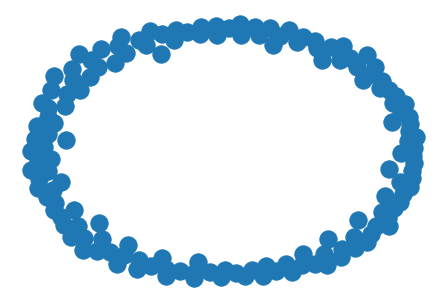

In [24]:
%matplotlib inline

# Visualizing the graph
nx.draw(G)

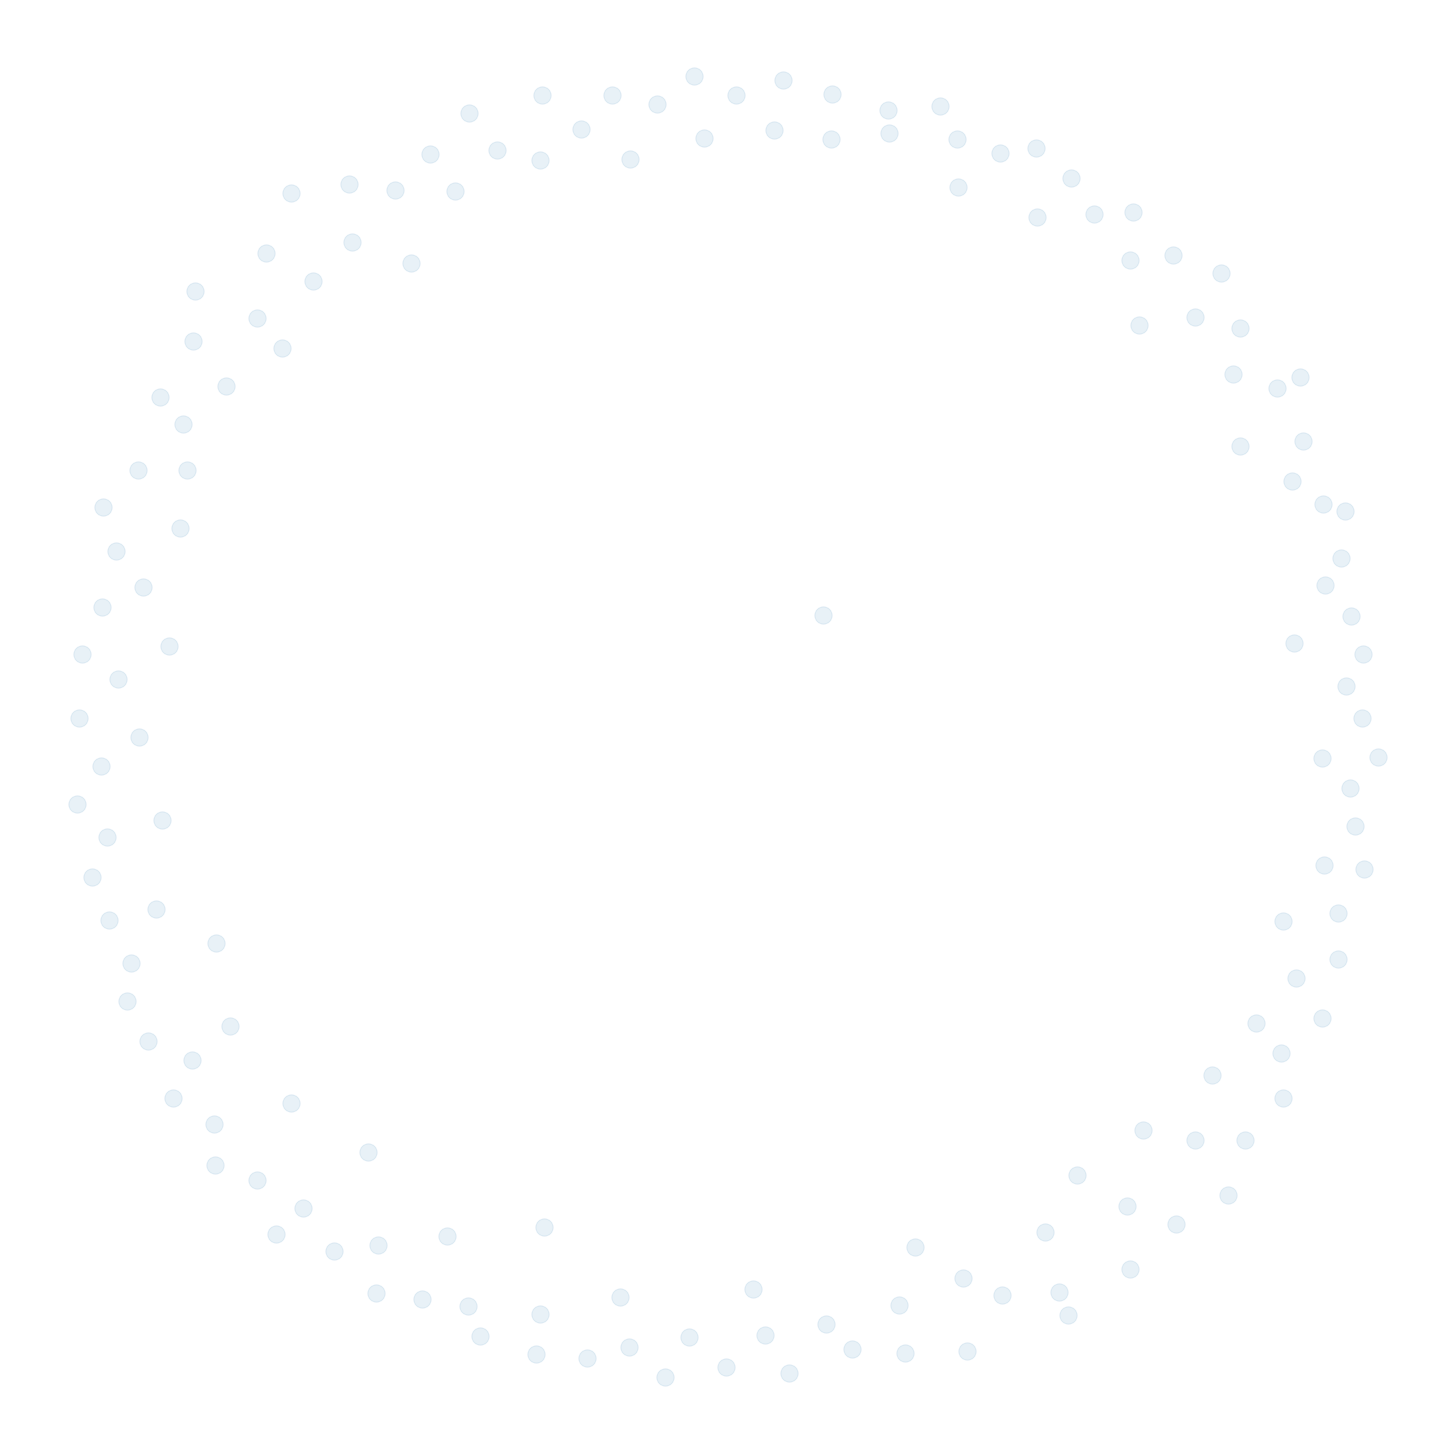

In [25]:
# Making the graph better using pyplot
from matplotlib import pyplot as plt
plt.figure(3, figsize=(20,20))
nx.draw(G, alpha=0.1, edge_color='b')

In [26]:
# Converting the friends lists to sets to compute the Jaccard similarity
friends = {user: set(friends[user]) for user in friends}

In [27]:
# Creating a function that computes the similarity of two sets of friends lists
def compute_similarity(friends1, friends2):
    return len(friends1 & friends2) / (len(friends1 | friends2) + 1e-6)

In [28]:
# Creating a function to perform the weighted graph of the similarity between users
def create_graph(followers, threshold=0):
    G = nx.Graph()
    for user1 in friends.keys():
        for user2 in friends.keys():
            if user1 == user2:
                continue
            weight = compute_similarity(friends[user1], friends[user2])
            if weight >= threshold:
                G.add_node(user1)
                G.add_node(user2)
                G.add_edge(user1, user2, weight=weight)
    return G

TypeError: 'int' object is not subscriptable

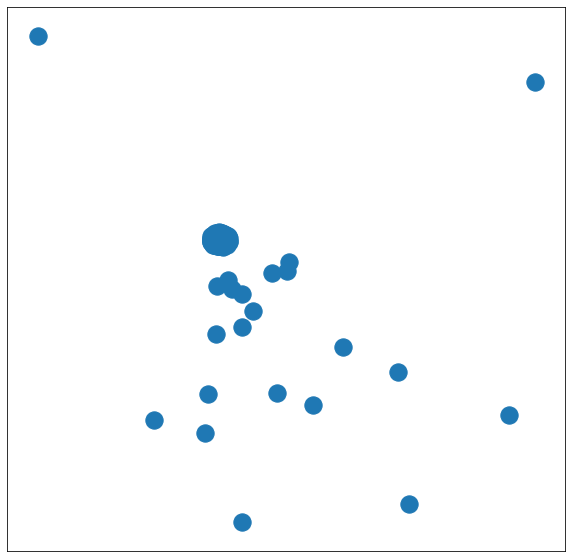

In [29]:
# Creating a graph by calling the function
G = create_graph(friends)

plt.figure(figsize=(10,10))    # Making the figure larger
pos = nx.spring_layout(G)    # Visualizing network with spring_layout
nx.draw_networkx_nodes(G, pos)    # Position the nodes
edgewidth = [d['weight'] for (u,d,v) in G.edges(data=True)]    # Getting the weights to draw the edges
nx.draw_networkx_edges(G, pos, width=edgewidth)    # Drawing the edges

In [30]:
# Creating a new graph passing a threshold of 0.1
G = create_graph(friends, 0.1)

In [36]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [38]:
# Finding the connected components in the graph
# sub_graphs = (G.subgraph(c).copy() for c in nx.connected_components(G))
sub_graphs = connected_component_subgraphs(G)

In [39]:
# Printing graph information
for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print(f'Subgraph {i} has {n_nodes} nodes')

Subgraph 0 has 128 nodes


In [40]:
# Doing same procedure and creating a new graph passing a threshold of 0.25
G = create_graph(friends, 0.25)
sub_graphs = connected_component_subgraphs(G)

# Printing graph information
for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes())
    print(f'Subgraph {i} has {n_nodes} nodes')

Subgraph 0 has 128 nodes


In [41]:
# Obtaining the connected components and the count of the connected components
sub_graphs = connected_component_subgraphs(G)
n_subgraphs = nx.number_connected_components(G)
n_subgraphs

1

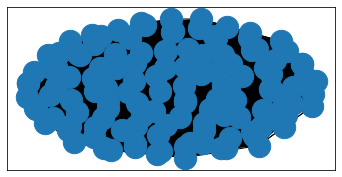

In [42]:
# Creating a new pyplot figure
fig = plt.figure(figsize=(20, (n_subgraphs * 3)))
for i, sub_graph in enumerate(sub_graphs):
    ax = fig.add_subplot(int(n_subgraphs / 3) + 1, 3, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, sub_graph.nodes(), ax=ax, node_size=500)
    nx.draw_networkx_edges(G, pos, sub_graph.edges(), ax=ax)

In [46]:
# Creating a function that takes a threshold value and a friends list, and computer the Silhouette Coefficient
import numpy as np
from sklearn.metrics import silhouette_score

def compute_silhouette(threshold, friends):
    G = create_graph(friends, threshold=threshold) 
    if len(G.nodes()) < 2:
        return -99
    sub_graphs = connected_component_subgraphs(G)

    if not (2 <= nx.number_connected_components(G) < len(G.nodes()) - 1): 
        return -99

    label_dict = {}
    for i, sub_graph in enumerate(sub_graphs): 
        for node in sub_graph.nodes(): 
            label_dict[node] = i

    labels = np.array([label_dict[node] for node in G.nodes()])
    X = nx.to_scipy_sparse_matrix(G).todense()
    X = 1 - X
    return silhouette_score(X, labels, metric='precomputed')

In [47]:
# Creating a function that inverts the compute_silhouette function
def inverted_silhouette(threshold, friends):
    return -compute_silhouette(threshold, friends)

In [48]:
# Calling functions to do optimization
from scipy.optimize import minimize
result = minimize(inverted_silhouette, 0.1, args=(friends,))
result

      fun: 99
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.1])